In [1]:
import matplotlib.pyplot as plt
import numpy as np

(2, 4, 100)


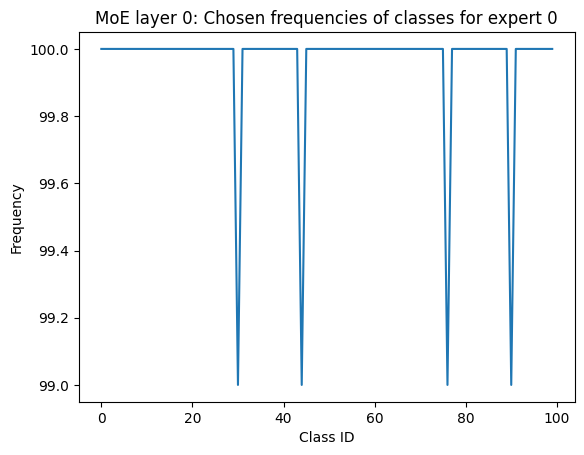

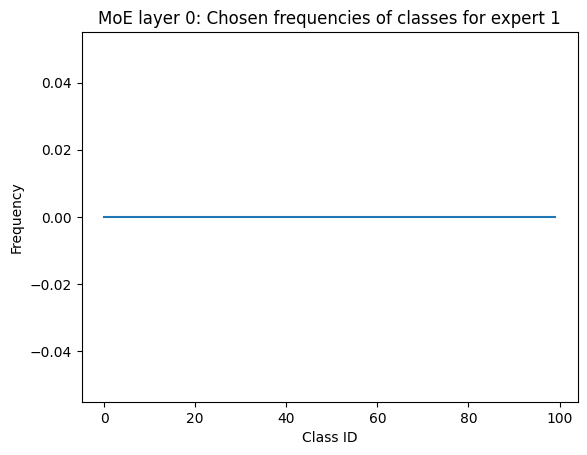

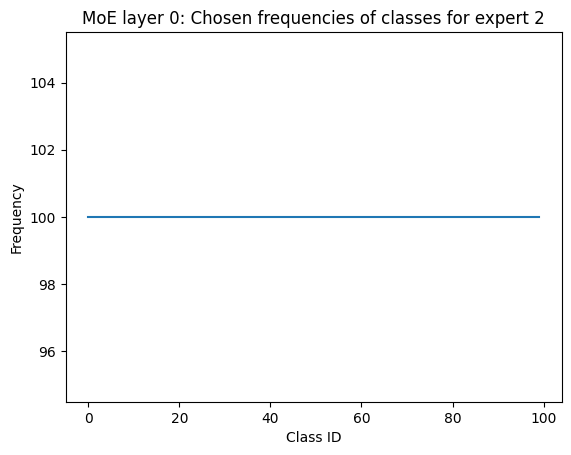

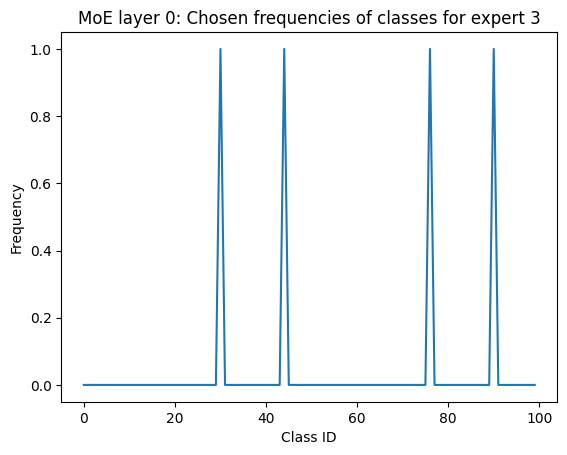

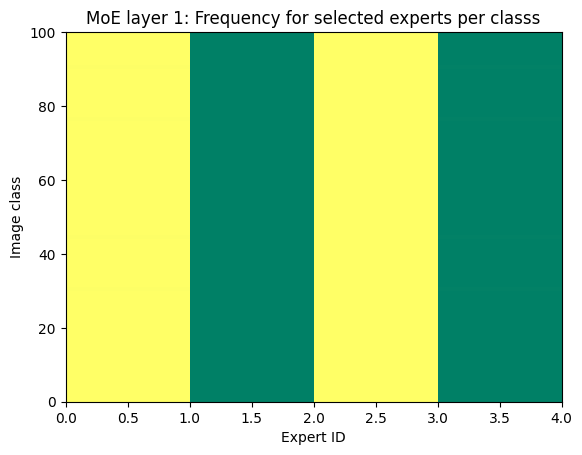

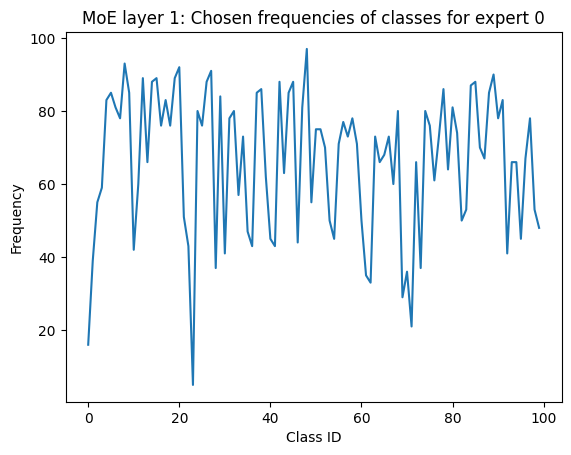

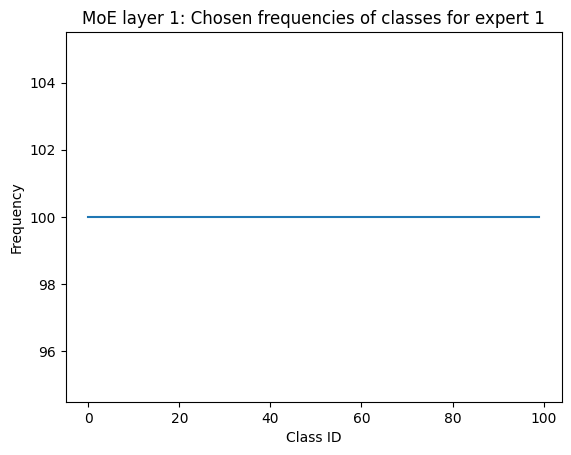

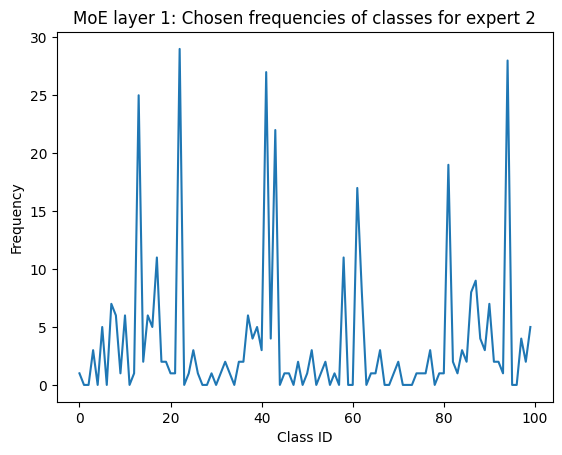

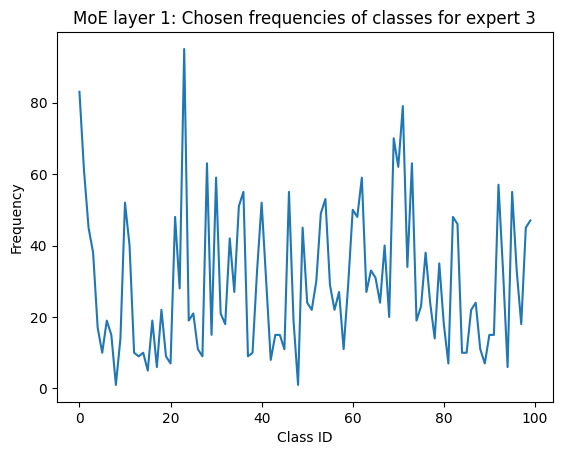

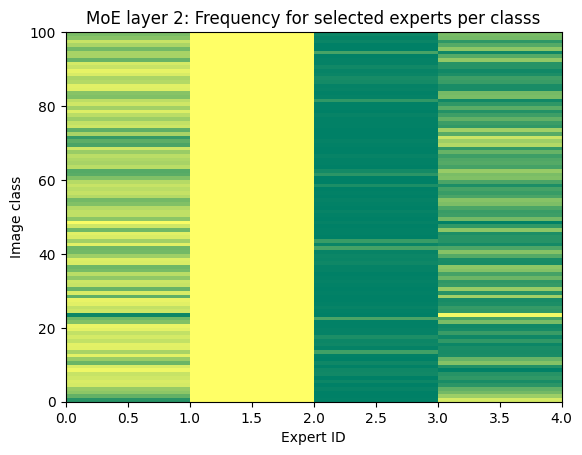

In [13]:
all_freq_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet32MoE/0917_093106/all_freq_from_experts_to_classes_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, freq_from_experts_to_classes in enumerate(all_freq_from_experts_to_classes):
    num_expert = freq_from_experts_to_classes.shape[0]
    classes_id = np.arange(100)
    for expert_id, freq_from_expert_to_classes in enumerate(freq_from_experts_to_classes):
        description = f'MoE layer {idx}: Chosen frequencies of classes for expert {expert_id}'
        plt.plot(classes_id, freq_from_expert_to_classes)
        plt.xlabel('Class ID')
        plt.ylabel('Frequency')
        plt.title(description)
        plt.show()
    description = f'MoE layer {idx+1}: Frequency for selected experts per classs'
    plt.pcolormesh(freq_from_experts_to_classes.T, cmap='summer')
    plt.xlabel('Expert ID')
    plt.ylabel('Image class')
    plt.title(description)
    plt.show()

(2, 4, 100)


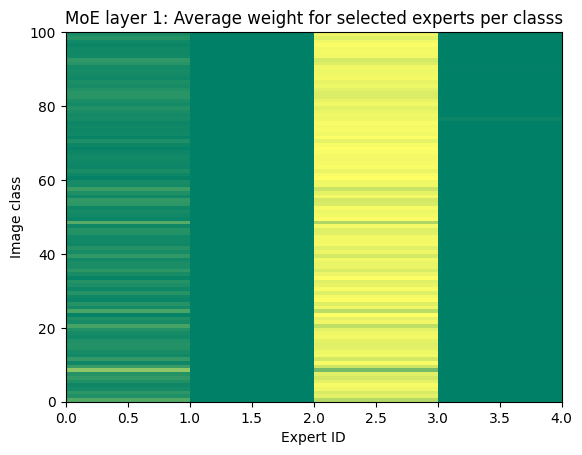

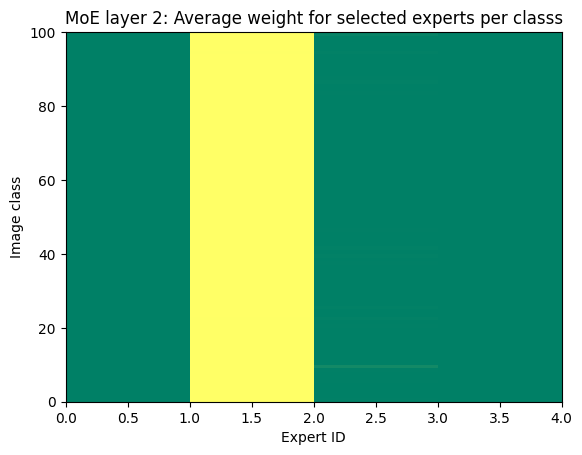

In [6]:
all_avg_weight_from_experts_to_classes = np.load('/datapool/workspace/3024hlh/saved/log/Imbalance_CIFAR100_LT_ResNet32MoE/0917_093106/all_avg_weight_from_experts_to_classes_epoch_200.npy')
print(all_freq_from_experts_to_classes.shape)

for idx, avg_weight_from_experts_to_classes in enumerate(all_avg_weight_from_experts_to_classes):
    num_expert = avg_weight_from_experts_to_classes.shape[0]
    num_classes = avg_weight_from_experts_to_classes.shape[1]
    expert_id_list = np.zeros(num_expert * num_classes)
    description = f'MoE layer {idx+1}: Average weight for selected experts per classs'
    plt.pcolormesh(avg_weight_from_experts_to_classes.T, cmap='summer')
    plt.xlabel('Expert ID')
    plt.ylabel('Image class')
    plt.title(description)
    plt.show()

# No.1

## Settings

* Time 2022-09-10
* 4 experts
* top 2 selected

## Observation 

* 在两个使用了MoE的nn.Conv中(CustomizedMoEBasicBlock的第二个nn.Conv Module)，可以观察到
    * 总有一个expert会所有的class选中（也就是frequency为100，即一个class里的所有的examples)
        * Why?
    * 其中有两个expert表现出了一种反对称互补的特点。比如Layer 1的Expert 0和2。这样的expert或许有一定的diversity。
    * 有一个expert不怎么活跃。例如Layer 0的Expert 2和Layer 1的Expert 3。
        * Why?
 
# No.2

## Settings

* Time 2022-09-17
* 4 experts
* top 2 selected